# Analysis on Spotify Songs

Spotify is a audio streaming and media services provider. It is one of the world's largest music streaming service providers, with over 356 million monthly active users, including 158 million paying subscribers, as of March 2021.

## Downloading the Dataset

We will download the Dataset from kaggle

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dishant098
Your Kaggle Key: ········


100%|██████████| 65.5k/65.5k [00:00<00:00, 23.3MB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './spotify-top-2000s-mega-dataset'

In [6]:
import os
os.listdir(data_dir)

['Spotify-2000.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "spotify-songs-analysis-project" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dishantpatel098/spotify-songs-analysis-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/dishantpatel098/spotify-songs-analysis-project


'https://jovian.ai/dishantpatel098/spotify-songs-analysis-project'

## Installing and Importing Packages
We will install and import the packages required for this project

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation and Cleaning
We will load the dataset and perform neccessary operations like handling missing or incorrect data

### Loading the Dataset

In [12]:
spotify_df = pd.read_csv('./spotify-top-2000s-mega-dataset/Spotify-2000.csv')
del spotify_df["Index"]

In [13]:
spotify_df

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


### Exploring the Data
Exploring the number of rows & columns, ranges of values etc.

In [14]:
spotify_df.shape

(1994, 14)

In [15]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 218.2+ KB


Here, we noticed that Length of the songs are in object data type so we need to convert the Length of the songs into int data type

In [16]:
spotify_df['Length (Duration)'] = spotify_df['Length (Duration)'].str.split(',').str.join('').astype(int)

Now, Let's check the Data Type of Length (Duration)

In [17]:
spotify_df["Length (Duration)"].dtype

dtype('int64')

In [18]:
spotify_df.describe()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,262.443330,28.858074,4.994985,59.52658
std,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,93.604387,29.011986,4.401566,14.35160
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.00000
25%,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,1412.000000,99.000000,55.000000,100.00000


### Handling Null Values (if any)

In [19]:
spotify_df.isna().sum()

Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

### Parsing Dataset

In [20]:
spotify_1900s_df = spotify_df[spotify_df.Year < 2000].copy()

In [21]:
spotify_1900s_df.sample(10)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1441,Like The Way I Do,Melissa Etheridge,folk,1988,101,84,60,-13,6,64,324,4,4,57
1108,Born to Be Alive - Original Mix 79,Patrick Hernandez,disco,1978,131,87,70,-6,21,81,188,8,3,66
1471,Lullaby,The Cure,dance rock,1989,94,56,72,-11,6,59,250,19,3,53
1696,Insomnia,Faithless,big beat,1996,127,58,79,-10,17,26,527,18,4,55
1508,"Night Fever - From ""Saturday Night Fever"" Soun...",Bee Gees,adult standards,1990,109,51,74,-16,14,90,210,2,3,54
1722,Karma Police,Radiohead,alternative rock,1997,75,51,36,-9,17,32,264,6,3,74
1841,Folsom Prison Blues,Johnny Cash,arkansas country,1964,111,53,69,-10,28,78,156,19,3,58
1938,Words,Bee Gees,adult standards,1968,80,29,26,-10,16,25,198,14,3,59
1889,Penny Lane,The Beatles,british invasion,1967,114,39,63,-10,10,65,182,41,4,45
1115,The Rose,Bette Midler,adult standards,1979,134,23,35,-10,38,18,221,90,3,67


In [22]:
spotify_2000s_df = spotify_df[spotify_df.Year >= 2000].copy()

In [23]:
spotify_2000s_df.sample(10)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
624,Three Days In A Row,Anouk,dutch indie,2015,171,50,36,-6,16,39,254,0,3,13
542,Animals,Martin Garrix,big room,2013,128,87,68,-6,37,4,304,0,4,65
374,Bad Romance,Lady Gaga,dance pop,2009,119,92,70,-4,8,71,295,0,4,79
720,Homesick,Dua Lipa,dance pop,2017,86,22,43,-9,11,40,230,95,4,71
507,Slapeloze Nachten,The Opposites,dutch hip hop,2012,112,65,81,-7,15,81,229,35,6,57
338,Resistance,Muse,modern rock,2009,135,77,47,-7,11,9,347,6,5,63
102,Girl,Anouk,dutch indie,2004,136,80,67,-5,6,79,211,1,3,56
580,Zandloper,Typhoon,dutch hip hop,2014,135,72,76,-8,95,51,280,5,24,47
538,Waves,Mr. Probz,dutch hip hop,2013,174,28,36,-12,38,20,174,54,4,59
297,Une Belle Histoire (Een Mooi Verhaal),Alderliefste,dutch pop,2008,87,68,57,-8,18,67,268,36,3,38


In [24]:
import jovian

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dishantpatel098/spotify-songs-analysis-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/dishantpatel098/spotify-songs-analysis-project


'https://jovian.ai/dishantpatel098/spotify-songs-analysis-project'

## Exploratory Analysis and Visualization


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [26]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let's see how many songs are released in particular year.

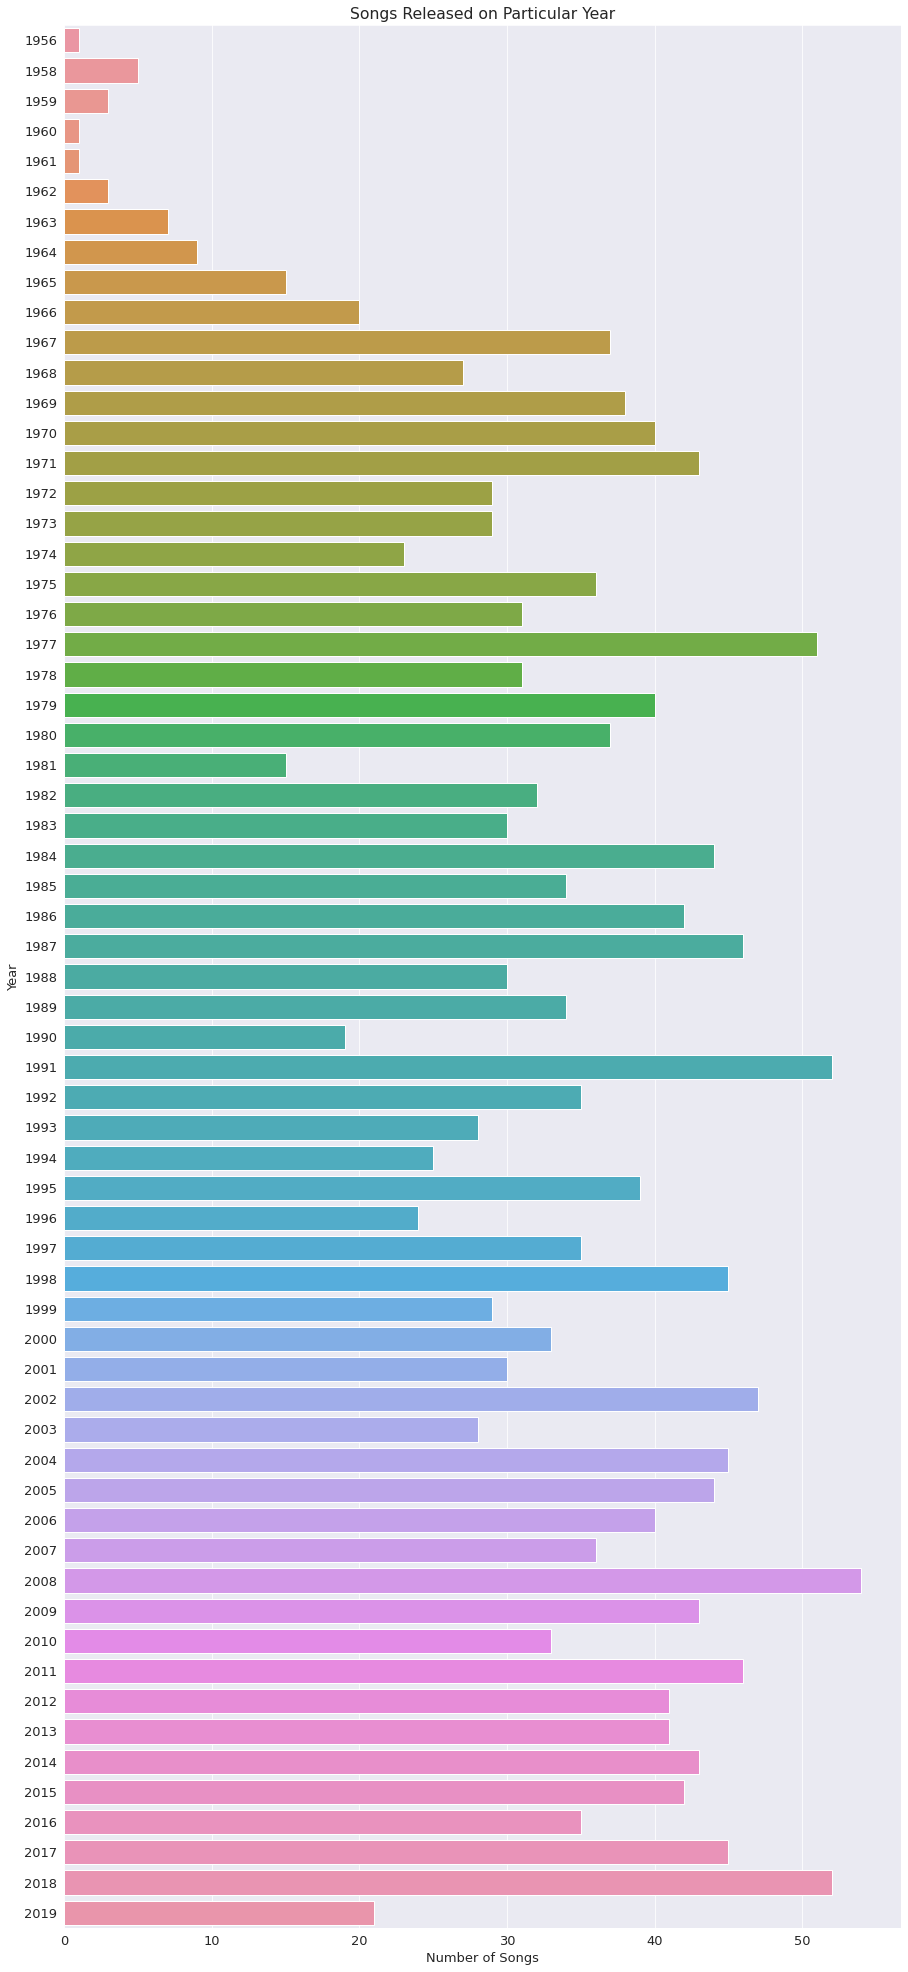

In [73]:
plt.figure(figsize=(15,35))

songs_year_graph = sns.countplot(y=spotify_df["Year"])

plt.xlabel("Number of Songs")
plt.title("Songs Released on Particular Year");

Let's see the average Energy in the songs released in paticular year.

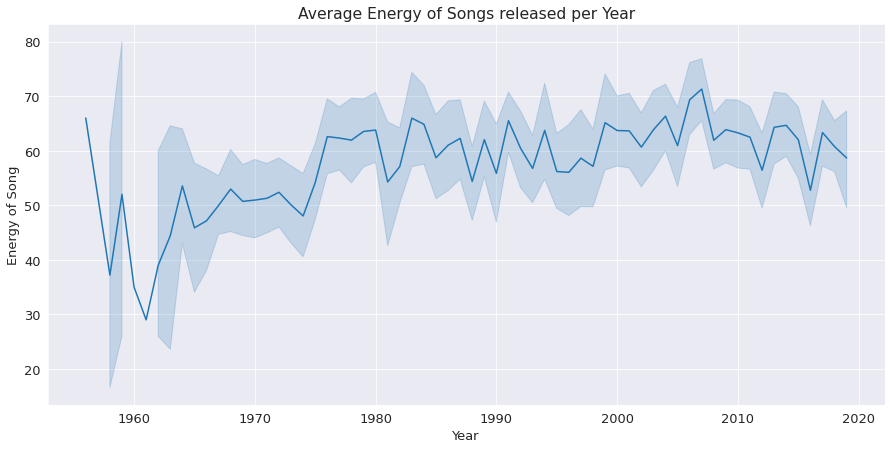

In [74]:
plt.figure(figsize=(15,7))

songs_energy_graph = sns.lineplot(x=spotify_df["Year"],
                                  y=spotify_df["Energy"]);
plt.ylabel("Energy of Song");
plt.title("Average Energy of Songs released per Year");

Let's see Popularity and Loudness of the songs in particular year.

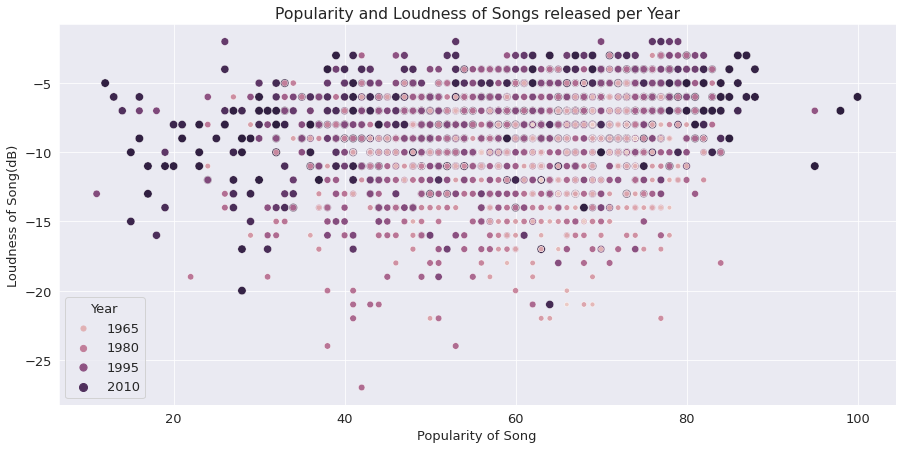

In [80]:
plt.figure(figsize=(15,7))

songs_loudness_graph = sns.scatterplot(x=spotify_df["Popularity"],
                                       y=spotify_df["Loudness (dB)"],
                                       hue=spotify_df["Year"],
                                       size=spotify_df["Year"]);

plt.ylabel("Loudness of Song(dB)");
plt.xlabel("Popularity of Song");
plt.title("Popularity and Loudness of Songs released per Year");

Let's observe the average loudness of the songs released in particular year.

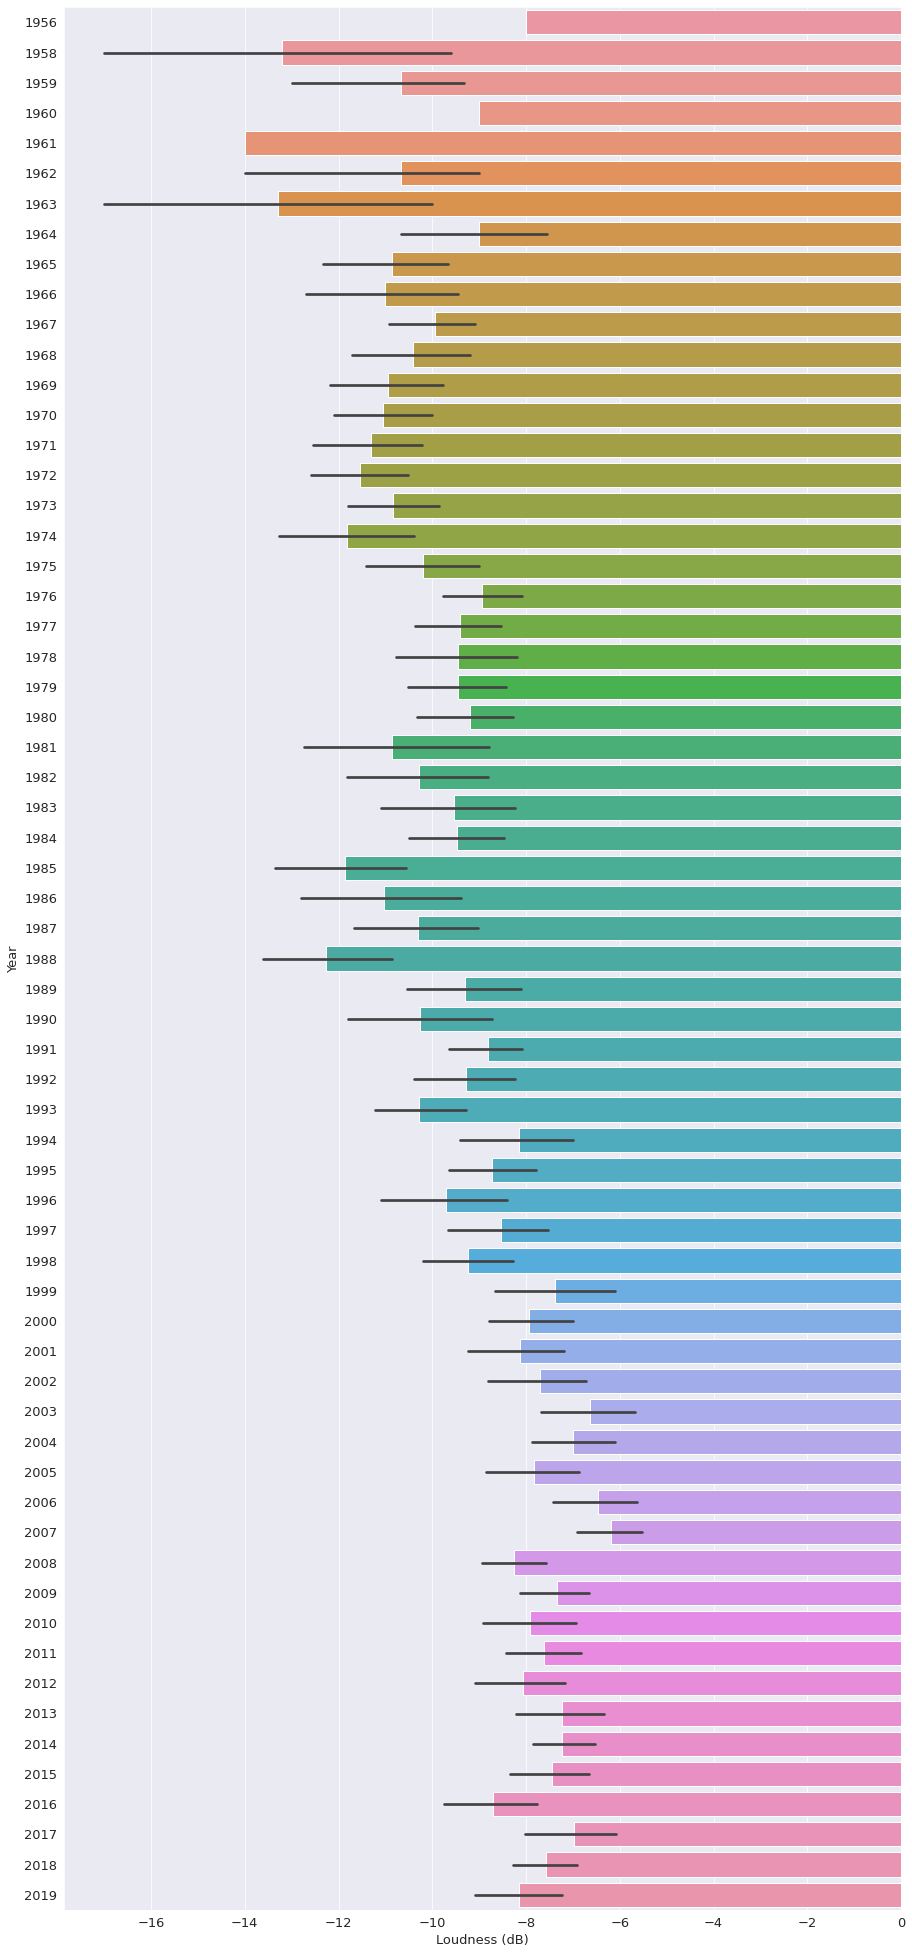

In [30]:
plt.figure(figsize=(15,35))

songs_loudness_graph = sns.barplot(x=spotify_df["Loudness (dB)"],
                                   y=spotify_df["Year"],
                                   orient="h");

Let's see the average Popularity of songs per year.

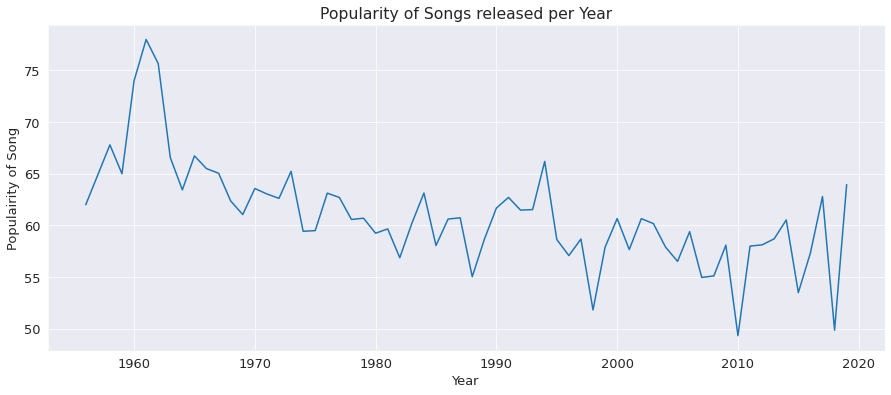

In [84]:
plt.figure(figsize=(15,6))

songs_popularity_graph = sns.lineplot(x=spotify_df["Year"],
                                  y=spotify_df["Popularity"],
                                  err_style="bars",
                                  ci=0);

plt.ylabel("Populairity of Song");
plt.title("Popularity of Songs released per Year");

Let us save and upload our work to Jovian before continuing

In [85]:
import jovian

In [86]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dishantpatel098/spotify-songs-analysis-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/dishantpatel098/spotify-songs-analysis-project


'https://jovian.ai/dishantpatel098/spotify-songs-analysis-project'

## Asking and Answering Questions



#### Q1: What are the top 10 most popular songs on Soptify of all time

In [37]:
popular_songs = spotify_df.sort_values("Popularity",ascending = False).head(10)

In [38]:
popular_songs

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
793,Dance Monkey,Tones and I,australian pop,2019,98,59,82,-6,15,51,209,69,9,100
787,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,98
786,bad guy,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,95
1641,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,150,63,34,-7,7,35,241,16,4,95
688,Believer,Imagine Dragons,modern rock,2017,125,78,78,-4,8,67,204,6,13,88
726,Shallow,Lady Gaga,dance pop,2018,96,39,57,-6,23,32,216,37,3,88
683,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,87
687,Shape of You,Ed Sheeran,pop,2017,96,65,83,-3,9,93,234,58,8,87
745,High Hopes,Panic! At The Disco,baroque pop,2018,82,90,58,-3,6,68,191,19,6,87
529,All of Me,John Legend,neo mellow,2013,120,26,42,-7,13,33,270,92,3,86


Here's the graphical representation for top 10 most popular songs on Spotify.

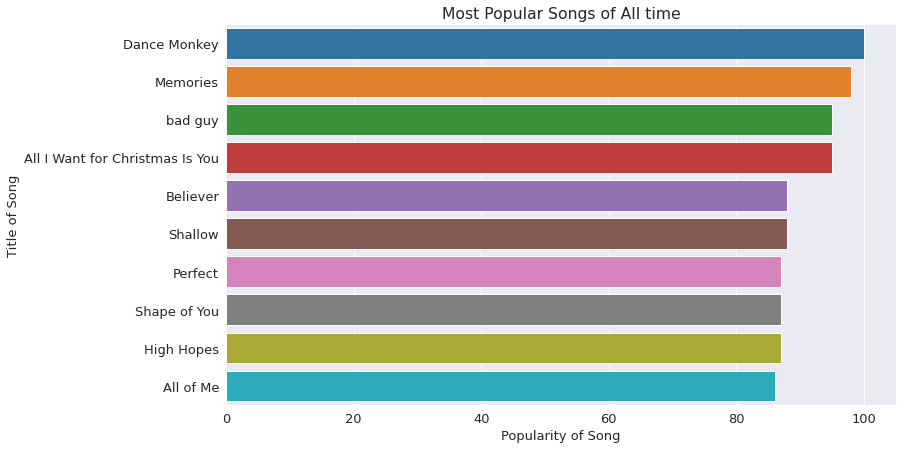

In [89]:
plt.figure(figsize=(12,7))

popular_songs_graph = sns.barplot(x=popular_songs.Popularity,
                                  y=popular_songs.Title);

plt.xlabel("Popularity of Song");
plt.ylabel("Title of Song");
plt.title("Most Popular Songs of All time");

#### Q2: Relation Between Danceability and Energy of Song.

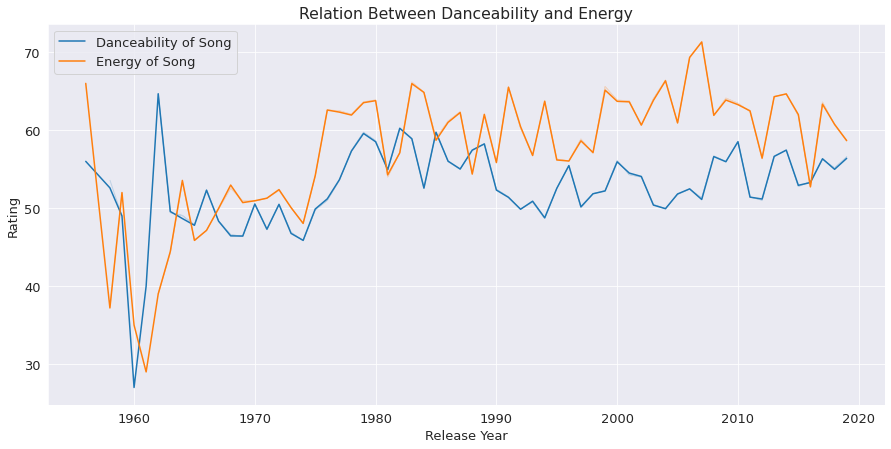

In [99]:
plt.figure(figsize=(15,7))

sns.lineplot(x=spotify_df["Year"],
             y=spotify_df["Danceability"],
             ci=0);
sns.lineplot(x=spotify_df["Year"],
             y=spotify_df["Energy"],
             ci=0);

plt.legend(["Danceability of Song","Energy of Song"]);
plt.xlabel("Release Year");
plt.ylabel("Rating");
plt.title("Relation Between Danceability and Energy");

#### Q3: Top 10 Genres of all time on Spotify.

In [100]:
top_genres_df=spotify_df.groupby(["Top Genre"],as_index=False)["Title"].count().sort_values('Title',ascending=False).head(10)
top_genres_df

,Top Genre,Title
5,album rock,413
2,adult standards,123
84,dutch pop,88
12,alternative rock,86
71,dance pop,83
82,dutch indie,75
9,alternative metal,70
72,dance rock,52
80,dutch cabaret,51
61,classic rock,51


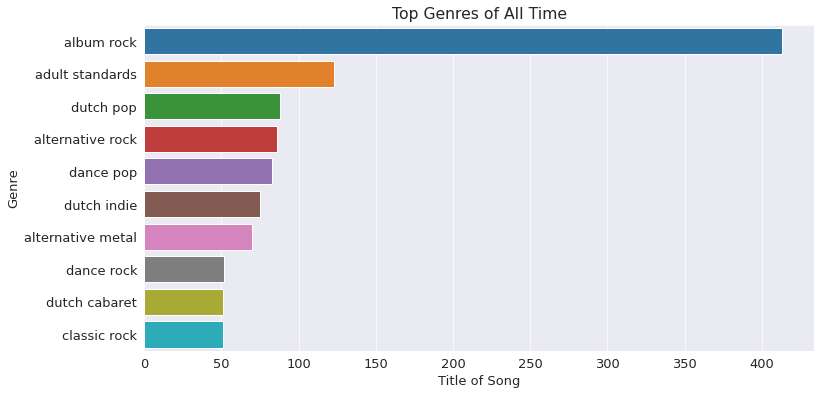

In [102]:
plt.figure(figsize=(12,6))

sns.barplot(x=top_genres_df["Title"],
            y=top_genres_df["Top Genre"]);

plt.xlabel("Title of Song");
plt.ylabel("Genre");
plt.title("Top Genres of All Time");

#### Q4: Most Title Released by Artists after 2000s

In [103]:
top_popular_df=spotify_2000s_df.groupby(["Artist","Year"],as_index=False)[["Title"]].count().sort_values('Title',ascending=False).head(40)

In [105]:
heatmap_df=top_popular_df.pivot("Artist","Year","Title").fillna(0)
heatmap_df

Year,2000,2001,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Artist,,,,,,,,,,,,,,,,,,
Adele,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
Amy Winehouse,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andre Hazes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
Anouk,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
Avicii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
BLØF,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
Beyoncé,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Boudewijn de Groot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
Coldplay,0.0,0.0,7.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


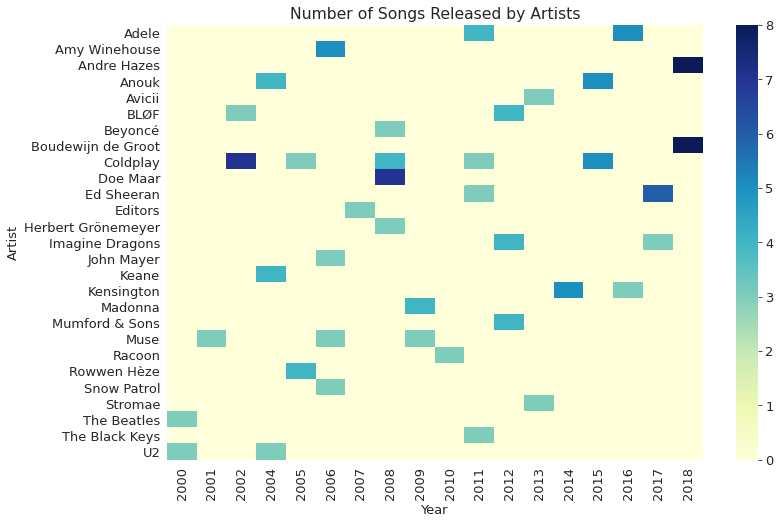

In [109]:
plt.figure(figsize=(12,8))

sns.heatmap(heatmap_df,
            cmap="YlGnBu");

plt.title("Number of Songs Released by Artists");

#### Q5: Average length (Duration) of the songs

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


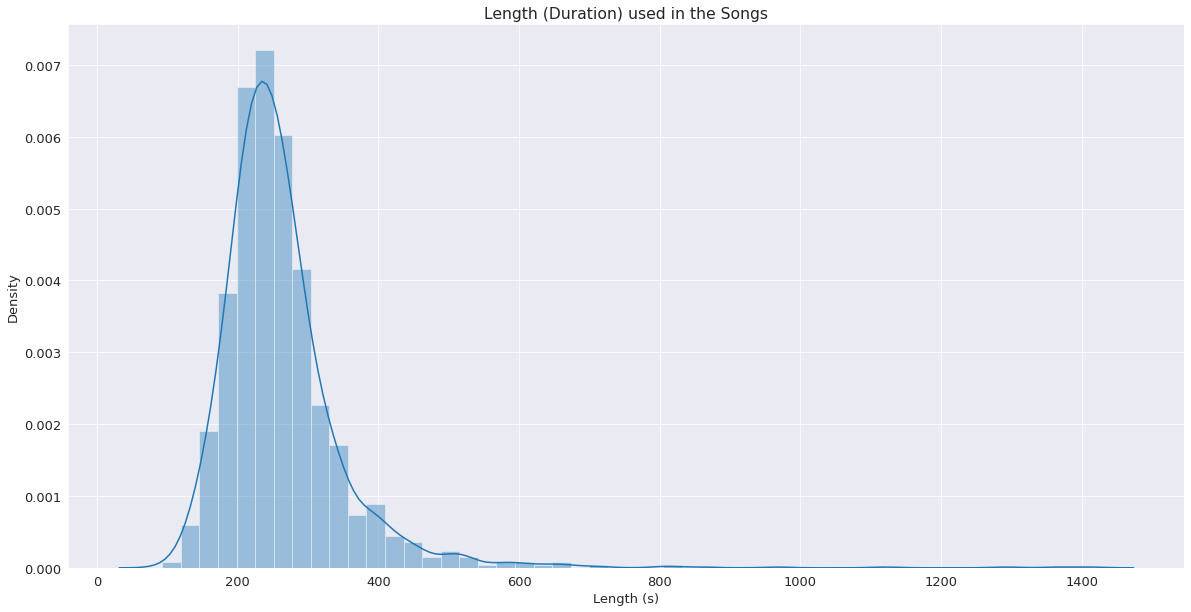

In [113]:
plt.figure(figsize=(20,10))

sns.distplot(x=spotify_df["Length (Duration)"],
            kde=True);

plt.xlabel("Length (s)")
plt.title("Length (Duration) used in the Songs");

Let us save and upload our work to Jovian before continuing.

In [114]:
import jovian

In [115]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dishantpatel098/spotify-songs-analysis-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/dishantpatel098/spotify-songs-analysis-project


'https://jovian.ai/dishantpatel098/spotify-songs-analysis-project'

## Inferences and Conclusion

From the analysis we discovered these:
- Most Populor Songs of All Time
- Relation Between Energy and Danceability of Songs
- Most songs released by artist in 2000s
- Average Length of Songs
- Top Genres of All Time 

In [116]:
import jovian

In [117]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dishantpatel098/spotify-songs-analysis-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/dishantpatel098/spotify-songs-analysis-project


'https://jovian.ai/dishantpatel098/spotify-songs-analysis-project'

## References and Future Work

**References** :
- Dataset : https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset

**Future Work** :
- We can actually find many relation between other data provided in Dataset and discover new trends.

In [118]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


In [ ]:
jovian.submit(assignment="zero-to-pandas-project")